# SFO and LAX Uber Rides - Hypothesis Testing
# Author: Lu (Christina) Jin

# Setup: Import all libraries

In [150]:
import os
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import statsmodels.api as sm
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
from pylab import rcParams
rcParams['figure.figsize'] = (20, 10)
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Analysis of Variance test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import f_oneway

## 1. Introducing SFO and LAX Uber Driver Average Daily Mileage Per Hour Data




> ### 1.1 Acquiring Data and Basic Cleaning

In [138]:
sfo_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQKKR48uSfSS77XnyaRqws4vuGYh7dgBLZp_juzJEZNRnkQ9DiSJcl-MQ8ia5JidNYErAZMXu4Q8FbS/pub?gid=1613941006&single=true&output=csv"
lax_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQKKR48uSfSS77XnyaRqws4vuGYh7dgBLZp_juzJEZNRnkQ9DiSJcl-MQ8ia5JidNYErAZMXu4Q8FbS/pub?gid=79638741&single=true&output=csv"

sfo_df = pd.read_csv(sfo_data_path)
lax_df = pd.read_csv(lax_data_path)

print(sfo_df.shape)
print(lax_df.shape)

(103, 3)
(103, 3)


> ### 1.2 Data Interpretions:
* Date:  The date that the record has been taken.
* SFO - Avg. Daily Miles Driven Per Hour: The miles driven each hour on daily average at around SFO airport.
* LAX - Avg. Daily Miles Driven Per Hour: The miles driven each hour on daily average at around LAX airport.
* Marketing_Campaign: A binary field that is set to either 1 for when there was a marketing campaign (post campaign) or 0 for when there was no marketing campaign (pre-campaign).

In [131]:
print(list(sfo_df))
print(list(lax_df))

['Date', 'SFO - Avg. Daily Miles Driven Per Hour', 'Marketing_Campaign']
['Date', 'LAX - Avg. Daily Miles Driven Per Hour', 'Marketing_Campaign']


## 2. Hypothesis Test Setup:
* The Null Hypothesis (H0) is that the average daily miles driven per hour after the marketing campaign was conducted is the same as the miles driven **prior to the marketing campaign**.

* The Alternate Hypothesis (H1) is that average daily miles driven per hour after the marketing campaign was conducted is greater than the miles driven **prior to the marketing campaign**.

* The p-value will be set to .05


> ### 2.1 Quantitative Variable Overview

In [139]:
sfo_df.describe()

,SFO - Avg. Daily Miles Driven Per Hour,Marketing_Campaign
count,103.000000,103.000000
mean,57.990239,0.281553
std,31.035443,0.451956
min,2.778033,0.000000
25%,41.786256,0.000000
50%,62.329092,0.000000
75%,78.922219,1.000000
max,111.202808,1.000000


In [140]:
lax_df.describe()

,LAX - Avg. Daily Miles Driven Per Hour,Marketing_Campaign
count,103.000000,103.000000
mean,122.166190,0.291262
std,72.805557,0.456566
min,-39.579673,0.000000
25%,70.549513,0.000000
50%,105.398258,0.000000
75%,163.799601,1.000000
max,318.897242,1.000000


## 3. Hyphothesis Testing

> ### 3.1 SFO Dataset
**Conclusion:**
According to the result below, the null hyphothesis (H0) has been rejected. Meaning there is a significant amount of difference in miles driven before and after the marketig campaign. 
But suprisingly, the average daily miles driven per hour after the marketing campaign was conducted were even less than before the marketing campaign was conducted. 
 **Therefore, I would say the marketing 
campaign WAS NOT SUCCESSFUL in raising the average miles driven per hour around the SFO airport area.**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


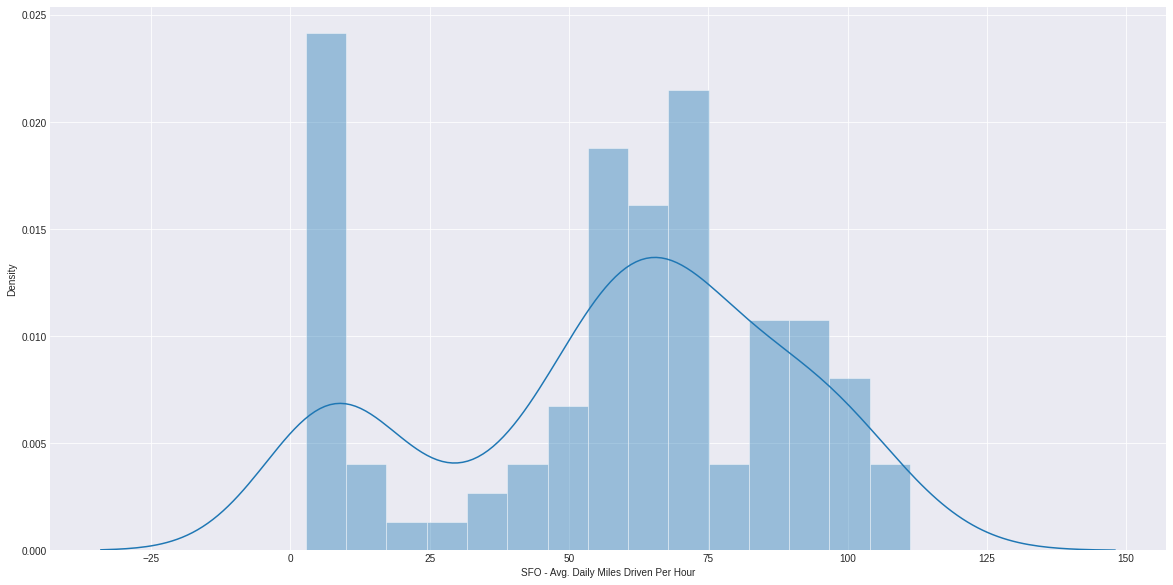

In [162]:
sfo_mph = sfo_df['SFO - Avg. Daily Miles Driven Per Hour']
ax = sns.distplot(sfo_mph, bins = 15)
#plt.xlim(0, 150)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


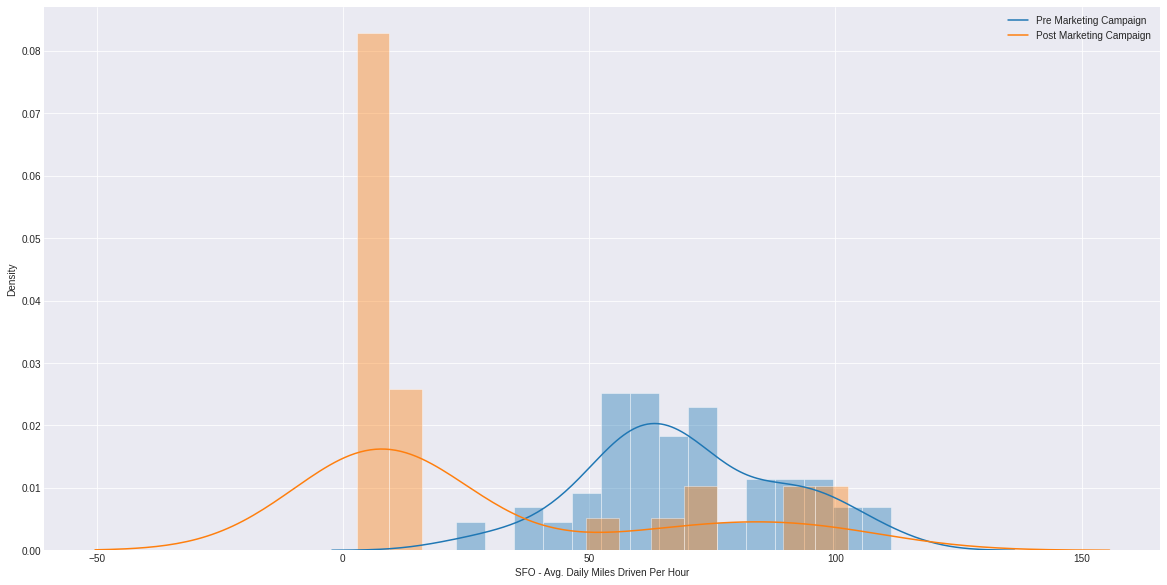

In [168]:
sfo_0 = sfo_mph.loc[sfo_df['Marketing_Campaign']==0]
sfo_1 = sfo_mph.loc[sfo_df['Marketing_Campaign']==1]

ax = sns.distplot(sfo_0, hist=True, bins=15)
ax = sns.distplot(sfo_1, hist=True, bins=15)
plt.legend(['Pre Marketing Campaign','Post Marketing Campaign'])

In [169]:
#generate three independent samples
sfo_0 = sfo_mph.loc[sfo_df['Marketing_Campaign']==0]
sfo_1 = sfo_mph.loc[sfo_df['Marketing_Campaign']==1]

#compare samples
stat, p = f_oneway(sfo_0, sfo_1)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=57.898, p=0.000
Different distributions (reject H0)


> ### 3.2 LAX Dataset
**Conclusion:**
According to the result below, the null hyphothesis (H0) has been rejected. Meaning there is a significant amount of difference in miles driven before and after the marketig campaign. 
By looking at the histogram, most of the post marketing campaign data to the right of the pre marketing campaign ones. This means the drivers usually drive more miles per hour after the campaign had been conducted in this area.
 **Therefore, I would say the marketing 
campaign WAS SUCCESSFUL in raising the average miles driven per hour around the LAX airport area.**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


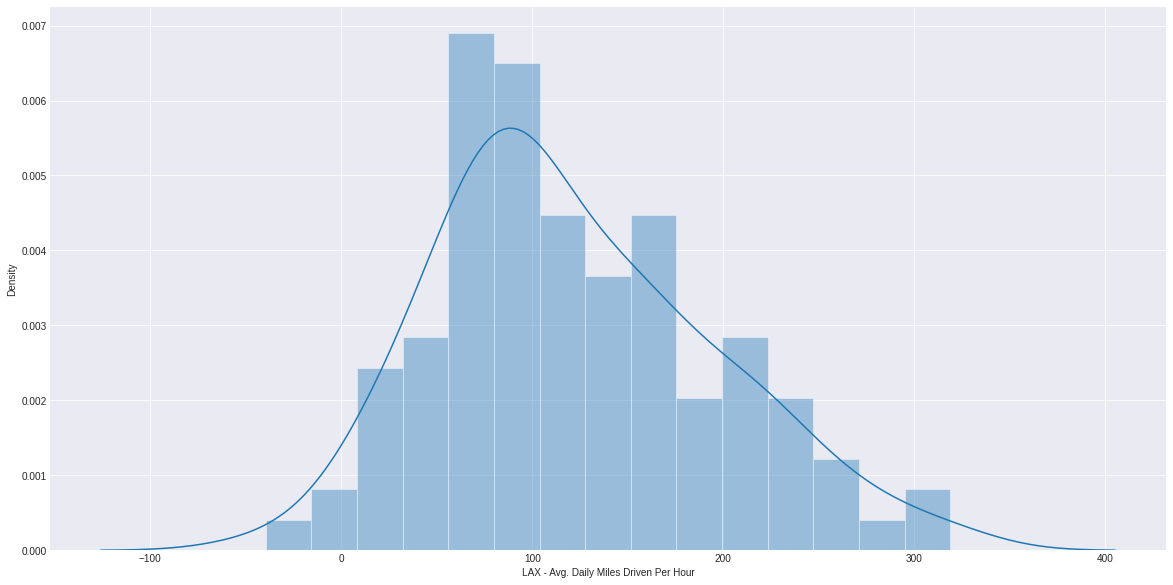

In [165]:
lax_mph = lax_df['LAX - Avg. Daily Miles Driven Per Hour']
ax = sns.distplot(lax_mph, bins = 15)
#plt.xlim(0, 150)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


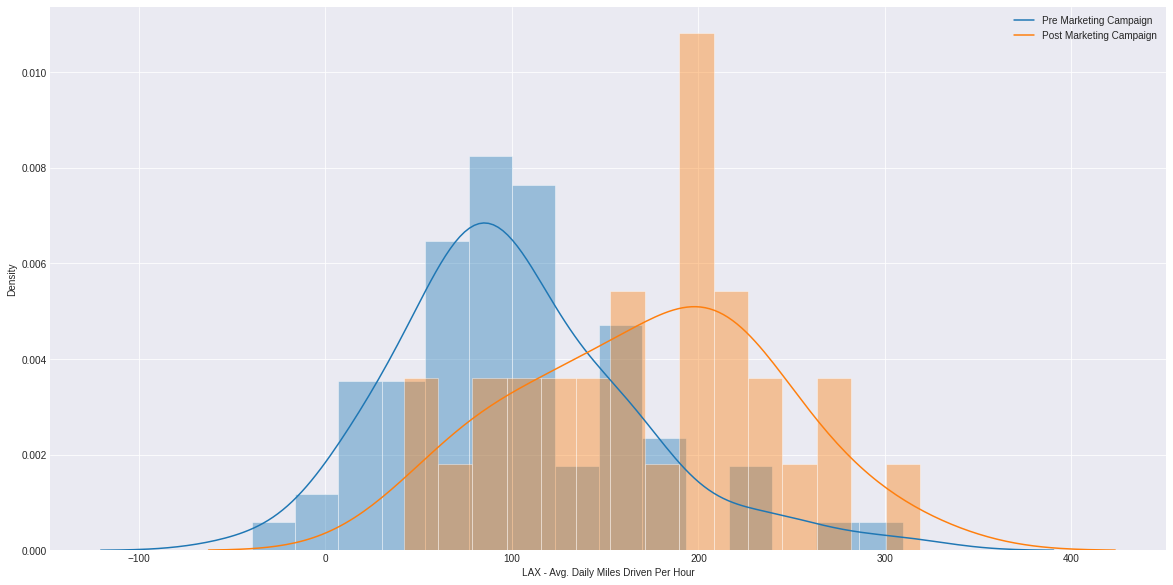

In [167]:
lax_0 = lax_mph.loc[lax_df['Marketing_Campaign']==0]
lax_1 = lax_mph.loc[lax_df['Marketing_Campaign']==1]

ax = sns.distplot(lax_0, hist=True, bins=15)
ax = sns.distplot(lax_1, hist=True, bins=15)
plt.legend(['Pre Marketing Campaign','Post Marketing Campaign'])

In [170]:
#generate three independent samples
lax_0 = lax_mph.loc[lax_df['Marketing_Campaign']==0]
lax_1 = lax_mph.loc[lax_df['Marketing_Campaign']==1]

#compare samples
stat, p = f_oneway(lax_0, lax_1)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=26.188, p=0.000
Different distributions (reject H0)


> ### 3.3 Other Factors
**Some other factors may affect the validity of this study include, but not limited to, the followings:**


*   Time of the day the record has been taken. (whether it's early in the morning, lunch time, afternoon or late at night, etc.)
*   Time of the year the record has been taken. (summer time or winter time; holiday seasons or not; etc.)
*   How much effort has been put into the marketing campaign.
*   The effectiveness of the marketing campaign.
*   Whether it's a part time or full time driver.


